In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [142]:
prec = pd.read_csv('data/region_prec_years.csv')
dat1 = pd.read_excel('data/GDL RegionConnect dataset .xlsx')
dat2 = pd.read_excel('data/GDL RegionConnect dataset .xlsx')

# fake data 2 -> create 2nd fake data point
dat1["year"] = 2000
dat2["year"] = 2016
d1 = np.random.rand(dat1.shape[0])
d2 = np.random.rand(dat1.shape[0])
dat2["Sub-national HDI"] = dat2["Sub-national HDI"] * (1+0.1*d1)
dat2["Mean years schooling"] = dat2["Mean years schooling"] * (1+0.1*d1)
df = pd.concat([dat1,dat2])

# merge climate data and indicator 
df = df.merge(prec, how="left", left_on=['year','GDLCODE'], right_on=['year', 'GDLcode'] )

In [137]:
year1 = 2000
year2 = 2016
soc_data = "Sub-national HDI"
climate_data = 'precipitation_trend'


df_pivot = df.pivot(index='GDLCODE', columns='year', values=[soc_data, climate_data])
df_pivot.columns = [f'{i[0]}_{i[1]}' for i in df_pivot.columns]

df_country = df.groupby(['Country', 'year']).mean([soc_data, climate_data]).reset_index()
df_country_pivot = df_country.pivot(index='Country', columns='year', values=[soc_data, climate_data])
df_country_pivot.columns = [f'{i[0]}_{i[1]}' for i in df_country_pivot.columns]

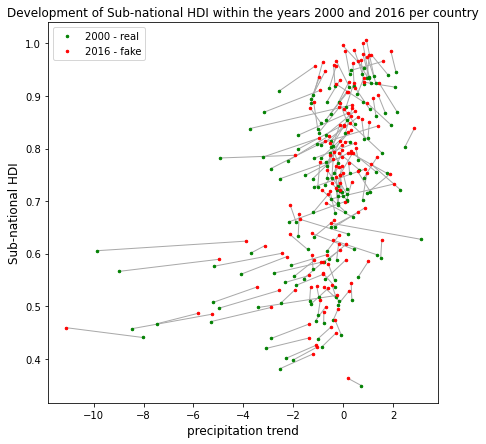

In [138]:
# development on country level because of too many data points
fig, ax = plt.subplots(figsize=(7,7))

for i, row in df_country_pivot.iterrows():
    plt.plot([row[f'{climate_data}_{year1}'], row[f'{climate_data}_{year2}']],
             [row[f'{soc_data}_{year1}'], row[f'{soc_data}_{year2}']], 
             color='darkgrey', ms=0, linewidth=1
            )
plt.plot(df_country_pivot[f'{climate_data}_{year1}'], df_country_pivot[f'{soc_data}_{year1}'], color='green', marker='.', linewidth=0, ms=5, label=f'{year1} - real')
plt.plot(df_country_pivot[f'{climate_data}_{year2}'], df_country_pivot[f'{soc_data}_{year2}'], color='red', marker='.', linewidth=0, ms=5, label=f'{year2} - fake')
plt.xlabel('precipitation trend', size=12)
plt.ylabel(soc_data,size=12)
plt.title(f'Development of {soc_data} within the years {year1} and {year2} per country')
plt.legend()
fig.savefig('one_plot.png')


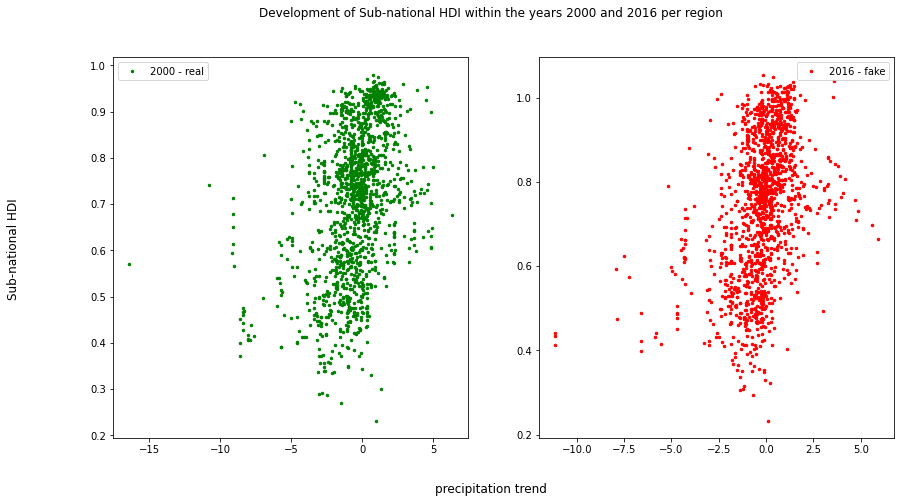

In [141]:
# development on country level because of too many data points
fig, ax = plt.subplots(1, 2, figsize=(14,7))
fig.suptitle(f'Development of {soc_data} within the years {year1} and {year2} per region')
fig.supxlabel('precipitation trend', size=12)
fig.supylabel(soc_data,size=12)

ax[0].plot(df_pivot[f'{climate_data}_{year1}'], df_pivot[f'{soc_data}_{year1}'], color='green', marker='.', linewidth=0, ms=5, label=f'{year1} - real')
ax[0].legend()

ax[1].plot(df_pivot[f'{climate_data}_{year2}'], df_pivot[f'{soc_data}_{year2}'], color='red', marker='.', linewidth=0, ms=5, label=f'{year2} - fake')
ax[1].legend()

fig.savefig('two_plots.png')
